## Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp 
import numpy as np
from collections import Counter
import re
import string
import warnings
from sklearn import metrics
warnings.filterwarnings("ignore")

# Set jupyter's max row display
pd.set_option('display.max_row', 1000)

# Set jupyter's max column width to 50
pd.set_option('display.max_columns', 50)

plt.style.use('ggplot')
%matplotlib inline

In [2]:
data = pd.read_excel('data_saved.xlsx')
data.tail()


,SL.NO.,DEPARTMENT,GENDER (M/F),PERMANENT LOCATION (STATE),AGE(YEARS),NAME OF SCHOOL(IN FULL)-CLASS X,MEDIUM OF INSTRUCTION-CLASS X,% OF CLASS X,MEDIUM OF INSTRUCTION - CLASS XII,% OF CLASS XII,DIPLOMA STREAM,MEDIUM OF INSTRUCTION- DIPLOMA,DIPLOMA AGGREGATE MARKS %,MEDIUM OF INSTRUCTION,SEM 1,SEM 2,SEM 3,SEM 4,SEM 5,SEM AVG,ANY BACKLOG(S) IN CURRENT COURSE(YES/NO),"IF YES, MENTION NUMBER OF BACKLOG(S)"
666,670,ME,M,BIHAR,20,GAYATRI YUGAL HIGH SCHOOL DOHARA(NAWADA),HINDI,67.2,NaN,NaN,AUTOMOBILE ENGINEERING,ENGLISH,72.76,ENGLISH,NaN,NaN,6.66,7.00,5.96,6.540000,YES,2
667,671,ME,M,WEST BENGAL,24,ARAMBAGH HIGH SCHOOL,BENGALI,71.5,NaN,NaN,PLASTICS TECHNLOGY,ENGLISH,66.37,ENGLISH,NaN,NaN,5.2,4.90,5.11,5.070000,YES,6
668,672,ME,M,WEST BENGAL,21,GOPALNAGAR BEHARILAL VIDYAPITH,BENGALI,74.62,NaN,NaN,MECHANICAL ENGINEERING,ENGLISH,76.3,ENGLISH,NaN,NaN,6.33,6.54,7.14,6.670000,NO,NaN
669,673,ME,M,WEST BENGAL,23,BDHAN SCHOOL,ENGLISH,60.5,ENGLISH,47.10,MECHANICAL ENGINEERING,ENGLISH,70.4,ENGLISH,NaN,NaN,6.46,5.92,5.64,6.006667,YES,3
670,674,ME,M,WEST BENGAL,24,PURNANAGAR PURNACHANDRA HIGH SCHOOL,BENGALI,80,BENGALI,66.28,MECHANICAL ENGINEERING,ENGLISH,78.5,ENGLISH,NaN,NaN,6.77,7.00,6.64,6.803333,YES,1


In [3]:
data.shape

(671, 22)

#### Dropping non useful Columns

In [4]:
data.drop(labels=['NAME OF SCHOOL(IN FULL)-CLASS X'],axis=1, inplace=True)

In [5]:
data.head()

,SL.NO.,DEPARTMENT,GENDER (M/F),PERMANENT LOCATION (STATE),AGE(YEARS),MEDIUM OF INSTRUCTION-CLASS X,% OF CLASS X,MEDIUM OF INSTRUCTION - CLASS XII,% OF CLASS XII,DIPLOMA STREAM,MEDIUM OF INSTRUCTION- DIPLOMA,DIPLOMA AGGREGATE MARKS %,MEDIUM OF INSTRUCTION,SEM 1,SEM 2,SEM 3,SEM 4,SEM 5,SEM AVG,ANY BACKLOG(S) IN CURRENT COURSE(YES/NO),"IF YES, MENTION NUMBER OF BACKLOG(S)"
0,1,AEIE,F,WEST BENGAL,21,ENGLISH,83.28,ENGLISH,84.66,NaN,NaN,NaN,ENGLISH,8.22,8.45,8.59,9.14,8.40,8.560,NaN,NaN
1,2,AEIE,F,BIHAR,21,HINDI,70.8,ENGLISH,60.40,NaN,NaN,NaN,ENGLISH,6.52,7.38,6.93,7.97,8.04,7.368,NaN,NaN
2,3,AEIE,M,JHARKHAND,20,ENGLISH,83.6,ENGLISH,84.00,NaN,NaN,NaN,ENGLISH,8.22,7.93,7.89,7.83,8.44,8.062,NaN,NaN
3,4,AEIE,F,WEST BENGAL,21,ENGLISH,87.38,ENGLISH,84.57,NaN,NaN,NaN,ENGLISH,8.59,8.45,9.04,9.59,9.08,8.950,NaN,NaN
4,5,AEIE,F,BIHAR,21,ENGLISH,91.14,ENGLISH,85.80,NaN,NaN,NaN,ENGLISH,7.70,8.28,7.85,7.79,7.80,7.884,NaN,NaN


In [6]:
data.isna().sum()

SL.NO.                                        0
DEPARTMENT                                    0
GENDER (M/F)                                  0
PERMANENT LOCATION (STATE)                    3
AGE(YEARS)                                    0
MEDIUM OF INSTRUCTION-CLASS X                 2
% OF CLASS X                                  5
MEDIUM OF INSTRUCTION - CLASS XII            50
% OF CLASS XII                               51
DIPLOMA STREAM                              573
MEDIUM OF INSTRUCTION- DIPLOMA              579
DIPLOMA AGGREGATE MARKS %                   578
MEDIUM OF INSTRUCTION                         4
SEM 1                                        89
SEM 2                                        90
SEM 3                                         9
SEM 4                                        15
SEM 5                                        15
SEM AVG                                      26
ANY BACKLOG(S) IN CURRENT COURSE(YES/NO)    117
IF YES, MENTION NUMBER OF BACKLOG(S)    

### Deleting **nan** rows of column 'PERMANENT LOCATION (STATE)'

In [7]:

data=data.dropna(subset=['PERMANENT LOCATION (STATE)'])


In [8]:
data.shape

(668, 21)

### Student count per department

In [9]:
data.groupby('DEPARTMENT')['SL.NO.'].count().reset_index(name='No. of students')

,DEPARTMENT,No. of students
0,AEIE,54
1,BME,24
2,CE,67
3,CSE,136
4,ECE,125
5,EE,123
6,IT,79
7,ME,60


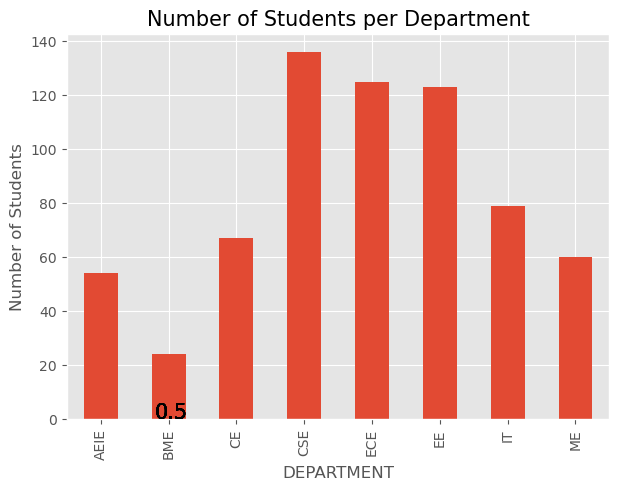

In [10]:
subplot = data.groupby('DEPARTMENT')['SL.NO.'].count().plot(kind='bar',figsize=(7,5))
subplot.set_ylabel('Number of Students')
subplot.set_title('Number of Students per Department', fontsize = 15)
for i in subplot.patches:
    # get_width pulls left or right; get_y pushes up or down
    subplot.text(i.get_width()+.3, i.get_y()+.2, \
            str(i.get_width()), fontsize=15,)

### Highest semester grade obtained by a student from a particular department?

In [11]:
data.groupby('DEPARTMENT')['SEM AVG'].max().reset_index(name = 'Highest Average Semester Grade')

,DEPARTMENT,Highest Average Semester Grade
0,AEIE,8.950
1,BME,8.966
2,CE,9.432
3,CSE,9.540
4,ECE,9.502
5,EE,9.268
6,IT,8.726
7,ME,9.006


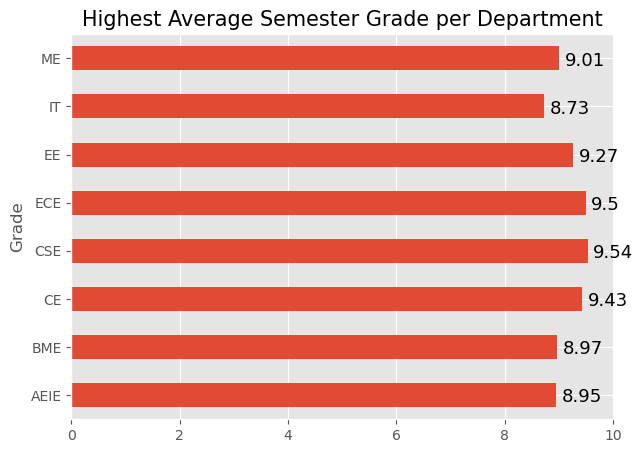

In [12]:
subplot = data.groupby('DEPARTMENT')['SEM AVG'].max().plot(kind='barh',figsize=(7,5))
subplot.set_ylabel('Grade')
subplot.set_title('Highest Average Semester Grade per Department', fontsize = 15)
for i in subplot.patches:
    # get_width pulls left or right; get_y pushes up or down
    subplot.text(i.get_width()+.1, i.get_y()+.1, \
            str(round(i.get_width(),2)), fontsize=13)

In [13]:
data[data['DEPARTMENT'] == 'CSE'][['SEM AVG']].head()

,SEM AVG
146,7.550
147,8.722
148,8.190
149,8.380
150,8.270


### State-wise student count

In [14]:
data['PERMANENT LOCATION (STATE)'].value_counts()

WEST BENGAL                    480
BIHAR                           94
JHARKHAND                       44
WESTBENGAL                      18
WEST BENGAL                      6
West Bengal                      5
TRIPURA                          5
WEST-BENGAL                      3
 WEST BENGAL                     2
WB                               2
                WEST BENGAL      1
               JHARKHAND         1
WEST BENGAL.                     1
WEST BINGAL                      1
INDIA                            1
               WEST BENGAL       1
UTTARAKHAND                      1
West bengal                      1
DELHI                            1
Name: PERMANENT LOCATION (STATE), dtype: int64

For the same state **West Bengal**, we have several variants like WB, WEST-BENGAL and so on. There are even cases where several spaces are appended before the word. Let's try to give it a proper shape. Otherwise, the numbers will be faulty. We will stick to the name WEST BENGAL and will replace the other variants accordingly. We have this problem for other states as well.

**Quick observation**: A candidate has even given India as his/her state

In [15]:
# # Manual engineering but okay! Can be written in an efficient manner using regex
# # The correct entries have also been specified. This is to avoid the entry of NaNs. 
# data['PERMANENT LOCATION (STATE)'] = data['PERMANENT LOCATION (STATE)'] .map({'WESTBENGAL':'WEST BENGAL',
# 'WEST BENGAL':'WEST BENGAL', 'West Bengal':'WEST BENGAL', 'WEST-BENGAL':'WEST BENGAL',
# ' WEST BENGAL':'WEST BENGAL', 'WB':'WEST BENGAL','West bengal':'WEST BENGAL', 'WEST BINGAL': 'WEST BENGAL',
# '               WEST BENGAL':'WEST BENGAL', '                WEST BENGAL':'WEST BENGAL','WEST BENGAL.':'WEST BENGAL',
# '               JHARKHAND':'JHARKHAND','BIHAR':'BIHAR','TRIPURA':'TRIPURA','JHARKHAND':'JHARKHAND','UTTARAKHAND':'UTTARAKHAND',
# 'DELHI':'DELHI','INDIA':'INDIA'})


# data['PERMANENT LOCATION (STATE)'] 


In [16]:
import re

for i, row in data.iterrows():
    match = re.findall(r'\s*[B|b]engal|BENGAL|WEST|west|WB|wb|[W|w]est\s*',row['PERMANENT LOCATION (STATE)'])
    if match:
        data.at[i,'PERMANENT LOCATION (STATE)'] = "WEST BENGAL"

    
# for i in data['PERMANENT LOCATION (STATE)']:
#         print(i)

#         match = re.findall(r'\s*[B|b]engal|BENGAL|WEST|west|WB|wb|[W|w]est\s*',i)
#         print(match)

#         if match:
#             # print("WEST BENGAL")
#             i = "WEST BENGAL ---"
#             # data['PERMANENT LOCATION (STATE)'] = "WEST BENGAL"
# else:
#     print("Invalid")


for i, row in data.iterrows():
    match = re.findall(r'\s*JHARKHAND\s*',row['PERMANENT LOCATION (STATE)'])
    if match:
        data.at[i,'PERMANENT LOCATION (STATE)'] = "JHARKHAND"

        

In [17]:
no_students_state_wise = data['PERMANENT LOCATION (STATE)'].value_counts().reset_index(name='Number of students')
no_students_state_wise.rename(columns={'index':'State'},inplace=True)
no_students_state_wise

,State,Number of students
0,WEST BENGAL,521
1,BIHAR,94
2,JHARKHAND,45
3,TRIPURA,5
4,UTTARAKHAND,1
5,INDIA,1
6,DELHI,1


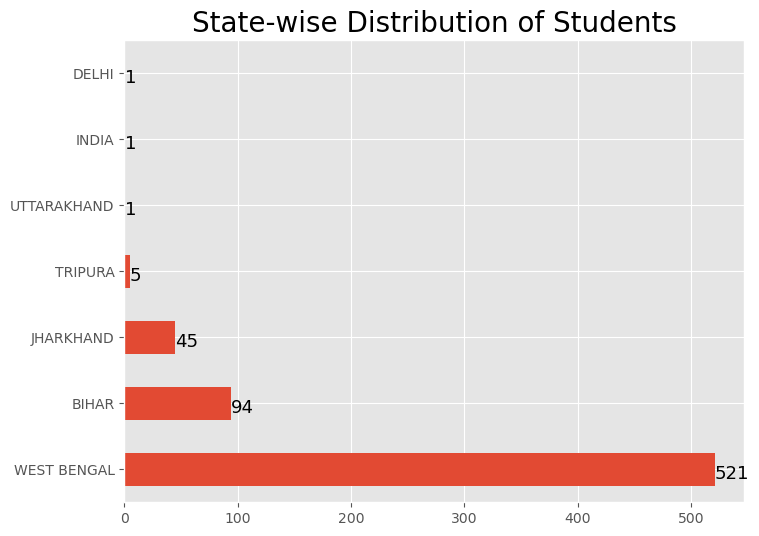

In [18]:
subplot = data['PERMANENT LOCATION (STATE)'].value_counts().plot(kind='barh',figsize=(8,6))
subplot.set_ylabel('')
subplot.set_title('State-wise Distribution of Students', fontsize = 20)
for i in subplot.patches:
    # get_width pulls left or right; get_y pushes up or down
    subplot.text(i.get_width()+.1, i.get_y()+.1, \
            str(round(i.get_width(),2)), fontsize=13)

dropping the row corresponding to India.

In [19]:
data[data['PERMANENT LOCATION (STATE)'] == 'INDIA']

,SL.NO.,DEPARTMENT,GENDER (M/F),PERMANENT LOCATION (STATE),AGE(YEARS),MEDIUM OF INSTRUCTION-CLASS X,% OF CLASS X,MEDIUM OF INSTRUCTION - CLASS XII,% OF CLASS XII,DIPLOMA STREAM,MEDIUM OF INSTRUCTION- DIPLOMA,DIPLOMA AGGREGATE MARKS %,MEDIUM OF INSTRUCTION,SEM 1,SEM 2,SEM 3,SEM 4,SEM 5,SEM AVG,ANY BACKLOG(S) IN CURRENT COURSE(YES/NO),"IF YES, MENTION NUMBER OF BACKLOG(S)"
249,250,CSE,M,INDIA,21,BENGALI,76.9,ENGLISH,58.6,NaN,NaN,NaN,ENGLISH,7.04,7.28,7.14,6.73,7.15,7.068,NO,NaN


In [20]:
data.drop(index=249, inplace=True)

In [21]:
data[data['PERMANENT LOCATION (STATE)'] == 'INDIA']

,SL.NO.,DEPARTMENT,GENDER (M/F),PERMANENT LOCATION (STATE),AGE(YEARS),MEDIUM OF INSTRUCTION-CLASS X,% OF CLASS X,MEDIUM OF INSTRUCTION - CLASS XII,% OF CLASS XII,DIPLOMA STREAM,MEDIUM OF INSTRUCTION- DIPLOMA,DIPLOMA AGGREGATE MARKS %,MEDIUM OF INSTRUCTION,SEM 1,SEM 2,SEM 3,SEM 4,SEM 5,SEM AVG,ANY BACKLOG(S) IN CURRENT COURSE(YES/NO),"IF YES, MENTION NUMBER OF BACKLOG(S)"


The intended record has been successfully deleted.

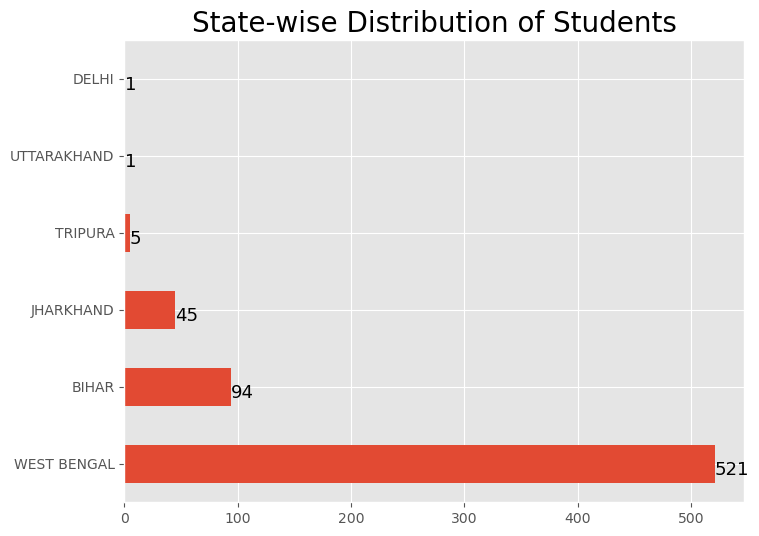

In [22]:
subplot = data['PERMANENT LOCATION (STATE)'].value_counts().plot(kind='barh',figsize=(8,6))
subplot.set_ylabel('')
subplot.set_title('State-wise Distribution of Students', fontsize = 20)
for i in subplot.patches:
    # get_width pulls left or right; get_y pushes up or down
    subplot.text(i.get_width()+.1, i.get_y()+.1, \
            str(round(i.get_width(),2)), fontsize=13)

### Performance of toppers in their high school examinations?

In [23]:
toppers = data.groupby('DEPARTMENT')['SEM AVG'].transform(max) == data['SEM AVG']
data[toppers][['DEPARTMENT', 'SEM AVG','% OF CLASS XII']]

,DEPARTMENT,SEM AVG,% OF CLASS XII
3,AEIE,8.950,84.57
63,BME,8.966,81.50
90,CE,9.432,92.00
238,CSE,9.540,82.72
295,ECE,9.502,87.28
454,EE,9.268,88.57
606,IT,8.726,89.17
645,ME,9.006,91.80


### How the Semester grades of the toppers have changed over time?

In [24]:
data[toppers][['DEPARTMENT','SEM 1', 'SEM 2', 'SEM 3', 'SEM 4', 'SEM 5']]

,DEPARTMENT,SEM 1,SEM 2,SEM 3,SEM 4,SEM 5
3,AEIE,8.59,8.45,9.04,9.59,9.08
63,BME,8.52,8.90,9.14,9.04,9.23
90,CE,8.78,9.38,9.62,9.62,9.76
238,CSE,9.11,9.86,9.34,9.54,9.85
295,ECE,9.22,9.72,9.72,9.23,9.62
454,EE,9.30,9.00,9.26,9.57,9.21
606,IT,7.48,8.83,8.86,9.27,9.19
645,ME,8.96,9.14,8.8,9.31,8.82


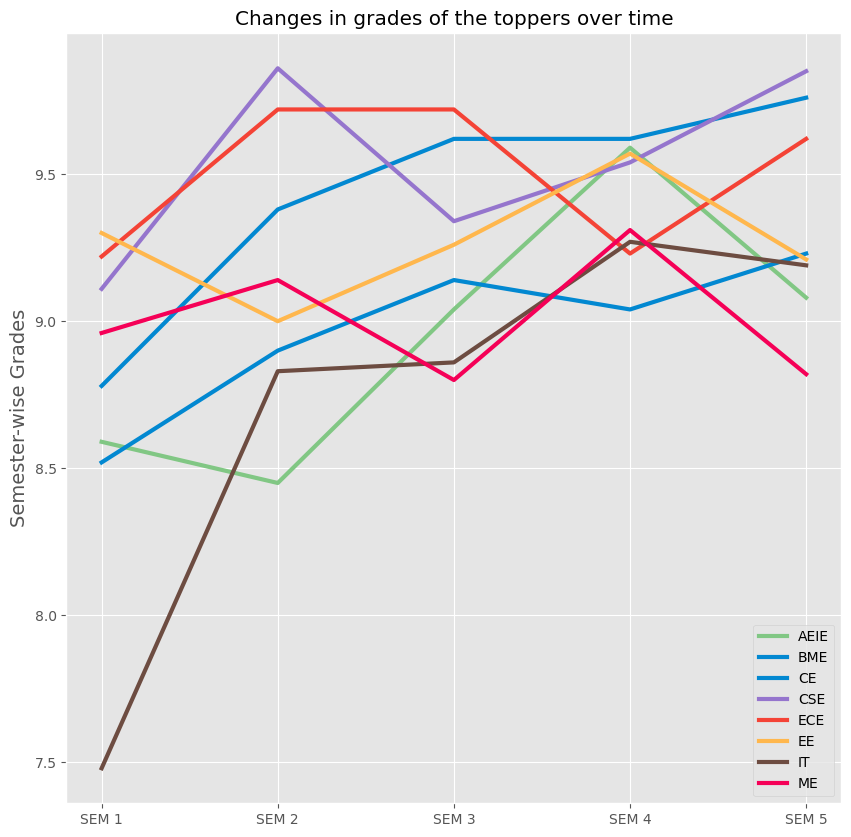

In [25]:
color=['#81c784','#0288d1','#0288d1','#9575cd','#f44336','#ffb74d','#6d4c41','#f50057']

fig, ax = plt.subplots(figsize=(10,10))
ax.set_ylabel('Semester-wise Grades',fontsize=14)
ax.set_title('Changes in grades of the toppers over time')
for i,c in zip(range(len(data[toppers][['DEPARTMENT','DEPARTMENT','SEM 1', 'SEM 2', 'SEM 3', 'SEM 4', 'SEM 5']])),color):
    ax.plot(['SEM 1', 'SEM 2', 'SEM 3', 'SEM 4', 'SEM 5'], 
            data[toppers][['SEM 1', 'SEM 2', 'SEM 3', 'SEM 4', 'SEM 5']].iloc[i], 
            color=c, linewidth=3,label=data[toppers]['DEPARTMENT'].iloc[i])
    
ax.legend(loc='lower right') 
# data[toppers][]

Looks like someone from the department of IT has really improved a lot. Kudos to the individual for that!

###  Total number of backlogs in each of the departments

In [26]:
data[data['IF YES, MENTION NUMBER OF BACKLOG(S)'].isna()==False]\
        [['IF YES, MENTION NUMBER OF BACKLOG(S)']].sample(10)

,"IF YES, MENTION NUMBER OF BACKLOG(S)"
613,1
196,1
172,1
327,2
436,3
610,1
89,3
451,10
343,2
51,3


The noise is real here. Some students have specified the subjects in which they got their backlogs instead of specifying numbers. Some specified 'N/A', '-', 'NO', 'NIL' and so on to denote that they did not get any backlogs. While the instruction for non-backlog candidates was to not specify anything and leave the field as it is. 

There are many ways to fix this. We will explore a one or two - 

In [27]:
data[data['IF YES, MENTION NUMBER OF BACKLOG(S)'].str.isalnum()==True]\
    [['IF YES, MENTION NUMBER OF BACKLOG(S)']]

,"IF YES, MENTION NUMBER OF BACKLOG(S)"
76,M302
77,M302
264,NIL
425,NO
460,NO
562,ONE
583,NO


In [28]:
data[data['IF YES, MENTION NUMBER OF BACKLOG(S)'].str.match('^[a-zA-Z0-9]+$')==False]\
        [['IF YES, MENTION NUMBER OF BACKLOG(S)']]

,"IF YES, MENTION NUMBER OF BACKLOG(S)"
33,"2ND SEM- MATHEMATICS II , BASIC COMPUTATION AN..."
74,1.MATHEMATICS-III
211,"PHYSICS-II,MICROPROCESSOR,DISCRETE MATHEMATICS"
212,DISCREATE MATH
289,-
324,-
404,-
554,N.A
607,-


In [29]:
data.iloc[33]['IF YES, MENTION NUMBER OF BACKLOG(S)']

'2ND SEM- MATHEMATICS II , BASIC COMPUTATION AND PRINCIPLES OF COMPUTER PROGRAMMING , ENGINEERING THERMODYNAMICS & FLUID MECHANICS,BASIC ELECTRICAL &ELECTRONICS ENGINEERING-II 3RD SEM -MATHEMATICS III'

A bit of manual engineering needed here - 

In [30]:
data.loc[76, 'IF YES, MENTION NUMBER OF BACKLOG(S)'] = 1
data.loc[77, 'IF YES, MENTION NUMBER OF BACKLOG(S)'] = 1
data.loc[562, 'IF YES, MENTION NUMBER OF BACKLOG(S)'] = 1
data.loc[33, 'IF YES, MENTION NUMBER OF BACKLOG(S)'] = 5
data.loc[74, 'IF YES, MENTION NUMBER OF BACKLOG(S)'] = 1
data.loc[211, 'IF YES, MENTION NUMBER OF BACKLOG(S)'] = 3
data.loc[212, 'IF YES, MENTION NUMBER OF BACKLOG(S)'] = 1

In [31]:
data[data['IF YES, MENTION NUMBER OF BACKLOG(S)'].isna()==False]\
        [['IF YES, MENTION NUMBER OF BACKLOG(S)']].sample(10)

,"IF YES, MENTION NUMBER OF BACKLOG(S)"
610,1
538,1
506,2
282,1
670,1
328,5
278,5
33,5
405,1
618,1


In [32]:
false_backlog = data.index[data['IF YES, MENTION NUMBER OF BACKLOG(S)'].str.match('^[\d]')==False].tolist()
noisy_backlogs = data.index[data['IF YES, MENTION NUMBER OF BACKLOG(S)'].isna()==False].tolist()
noisy_backlogs = set(noisy_backlogs) - set(false_backlog)

In [33]:
data.loc[noisy_backlogs][['DEPARTMENT','IF YES, MENTION NUMBER OF BACKLOG(S)']].sample(10)

,DEPARTMENT,"IF YES, MENTION NUMBER OF BACKLOG(S)"
359,ECE,7
113,CE,1
33,AEIE,5
221,CSE,1
334,ECE,2
464,EE,3
621,ME,10
406,ECE,4
92,CE,1
451,EE,10


In [34]:
noisy_backlogs_df = data.loc[noisy_backlogs]\
                [['DEPARTMENT','IF YES, MENTION NUMBER OF BACKLOG(S)']]
label_counts = Counter(noisy_backlogs_df['DEPARTMENT'].values)
label_counts.most_common()

[('ME', 29),
 ('CSE', 27),
 ('EE', 25),
 ('ECE', 24),
 ('CE', 16),
 ('IT', 13),
 ('AEIE', 8),
 ('BME', 5)]

In [35]:
plot_df = pd.DataFrame(label_counts.most_common(),columns=['DEPARTMENT','Backlog Count'])
plot_df

,DEPARTMENT,Backlog Count
0,ME,29
1,CSE,27
2,EE,25
3,ECE,24
4,CE,16
5,IT,13
6,AEIE,8
7,BME,5


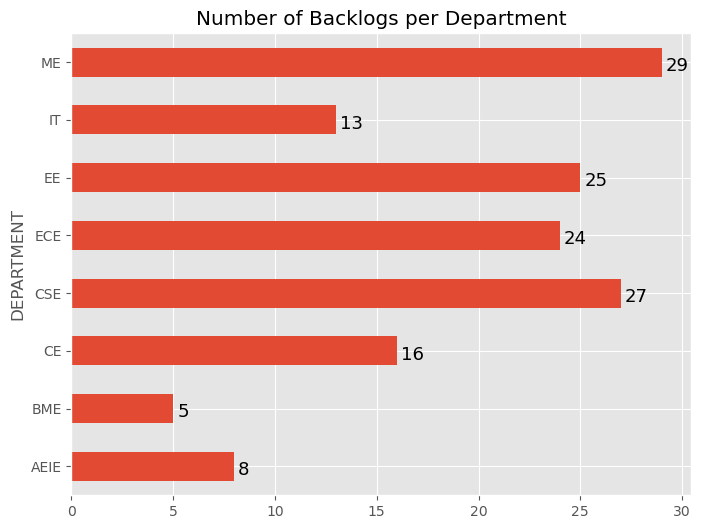

In [36]:
subplot = plot_df.groupby('DEPARTMENT')['Backlog Count'].sum().plot(kind='barh',figsize=(8,6))
subplot.set_title('Number of Backlogs per Department')
for i in subplot.patches:
    # get_width pulls left or right; get_y pushes up or down
    subplot.text(i.get_width()+.20, i.get_y()+.1, \
            str(i.get_width()), fontsize=13)

So, the department of BME is good enough. But there is another factor to be considered here - **Number of students perdepartment**.


In [37]:
no_stu_dept_wise = data.groupby('DEPARTMENT')['SL.NO.'].count().reset_index(name='Student Count')
no_stu_dept_wise.merge(plot_df,on='DEPARTMENT')

,DEPARTMENT,Student Count,Backlog Count
0,AEIE,54,8
1,BME,24,5
2,CE,67,16
3,CSE,135,27
4,ECE,125,24
5,EE,123,25
6,IT,79,13
7,ME,60,29


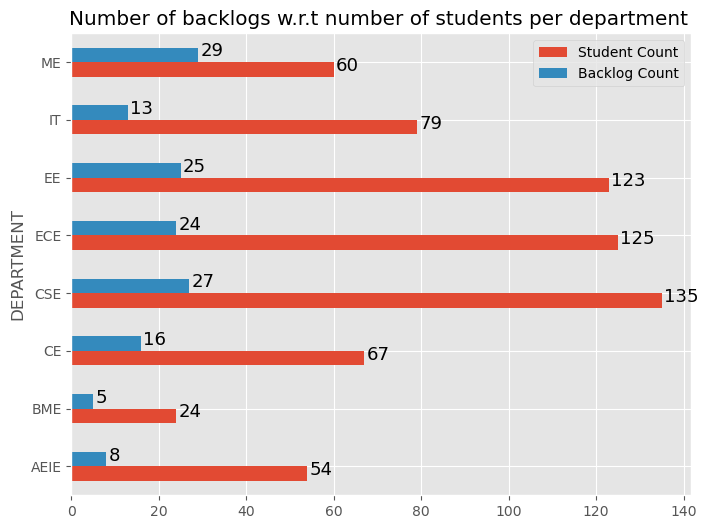

In [38]:
stu_backlog_count= no_stu_dept_wise.merge(plot_df,on='DEPARTMENT')
subplot = stu_backlog_count.groupby('DEPARTMENT').sum().plot(kind='barh',figsize=(8,6))
subplot.set_title('Number of backlogs w.r.t number of students per department ')
for i in subplot.patches:
    # get_width pulls left or right; get_y pushes up or down
    subplot.text(i.get_width()+.5, i.get_y()+.1, \
            str(i.get_width()), fontsize=13)

## 🔗 Modelling

In [39]:
data.isnull().sum()

SL.NO.                                        0
DEPARTMENT                                    0
GENDER (M/F)                                  0
PERMANENT LOCATION (STATE)                    0
AGE(YEARS)                                    0
MEDIUM OF INSTRUCTION-CLASS X                 2
% OF CLASS X                                  5
MEDIUM OF INSTRUCTION - CLASS XII            50
% OF CLASS XII                               51
DIPLOMA STREAM                              569
MEDIUM OF INSTRUCTION- DIPLOMA              575
DIPLOMA AGGREGATE MARKS %                   574
MEDIUM OF INSTRUCTION                         3
SEM 1                                        88
SEM 2                                        89
SEM 3                                         8
SEM 4                                        13
SEM 5                                        13
SEM AVG                                      24
ANY BACKLOG(S) IN CURRENT COURSE(YES/NO)    116
IF YES, MENTION NUMBER OF BACKLOG(S)    

#### ❑ Replace the missing values for numerical columns with Mean

In [40]:
data.drop([228], inplace = True)
#Manulal Engineering 228 was a row containing non-numeric value in 'SEM 3' column

In [41]:
data['SEM 1'] = data['SEM 1'].fillna(data['SEM 1'].mean())
data['SEM 2'] = data['SEM 2'].fillna(data['SEM 2'].mean())
data['SEM 3'] = data['SEM 3'].fillna(data['SEM 3'].mean())
data['SEM 4'] = data['SEM 4'].fillna(data['SEM 4'].mean())
data['SEM 5'] = data['SEM 5'].fillna(data['SEM 5'].mean())

In [42]:
result = data.select_dtypes(include='number')
result.head()

,SL.NO.,% OF CLASS XII,SEM 1,SEM 2,SEM 3,SEM 4,SEM 5,SEM AVG
0,1,84.66,8.22,8.45,8.59,9.14,8.40,8.560
1,2,60.40,6.52,7.38,6.93,7.97,8.04,7.368
2,3,84.00,8.22,7.93,7.89,7.83,8.44,8.062
3,4,84.57,8.59,8.45,9.04,9.59,9.08,8.950
4,5,85.80,7.70,8.28,7.85,7.79,7.80,7.884


In [43]:
result.to_csv('result.csv',index=False)

In [44]:
len(result.index)

666

In [45]:
X=np.asanyarray(result[["SEM 1","SEM 2","SEM 3","SEM 4"]].copy())
y=np.asanyarray(result['SEM 5'])

In [46]:
X.shape,y.shape

((666, 4), (666,))

In [47]:
X[:5]

array([[8.22, 8.45, 8.59, 9.14],
       [6.52, 7.38, 6.93, 7.97],
       [8.22, 7.93, 7.89, 7.83],
       [8.59, 8.45, 9.04, 9.59],
       [7.7 , 8.28, 7.85, 7.79]])

In [48]:
y[:5]

array([8.4 , 8.04, 8.44, 9.08, 7.8 ])

In [49]:
# splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [50]:
X_train

array([[7.38468858, 7.54282496, 6.46      , 5.92      ],
       [7.38468858, 7.54282496, 6.2       , 5.8       ],
       [6.19      , 6.03      , 6.3       , 7.51229709],
       ...,
       [6.37      , 6.97      , 6.9       , 7.69      ],
       [7.3       , 7.24      , 7.41      , 6.77      ],
       [7.19      , 7.72      , 7.31      , 7.54      ]])

In [51]:
y_train[:5]

array([5.64, 6.62, 6.29, 7.5 , 6.88])

### ❏ Linear Regression Model

In [52]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [53]:
# predicting 
y_train_predict=LR.predict(X_train)
y_test_predict=LR.predict(X_test)

In [54]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_test_predict),4)

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 0.3181741392505993
MSE: 0.1512589576594412
RMSE: 0.38892024588524726
Explained Variance Score: 0.8237003785668255 4

-------Train Data--------
MAE: 0.38597482059521254
MSE: 0.2682469198259088
RMSE: 0.5179255929435316

-----Training Accuracy-------
72.7
-----Testing Accuracy--------
82.3


In [95]:
predicted = LR.predict([[3,3,3,3]])
predicted

array([3.73324218])

### ❏ Random Forest Model

In [56]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [57]:
y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)

In [58]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 0.3363508828444779
MSE: 0.17917724514900235
RMSE: 0.4232933322756246

-------Train Data--------
MAE: 0.2915952983543072
MSE: 0.16218951099544568
RMSE: 0.4027275890666614


In [59]:
print("-----------Training Accuracy------------")
print(round(random_forest_model.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(random_forest_model.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
83.5
-----------Testing Accuracy------------
79.0


In [94]:
predicted = random_forest_model.predict([[3,3,3,3]])
predicted

array([5.14163358])

### ❏ SVM 

In [61]:
from sklearn.svm import SVR
svm_regr = SVR(kernel='rbf')
svm_regr.fit(X_train, y_train)

SVR()

In [62]:
y_train_predict=svm_regr.predict(X_train)
y_test_predict=svm_regr.predict(X_test)

In [63]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 0.31235761665647416
MSE: 0.1609030930961599
RMSE: 0.4011272779257974

-------Train Data--------
MAE: 0.35563775064498077
MSE: 0.24915927938688603
RMSE: 0.4991585713847715


In [64]:
print("-----------Training Accuracy------------")
print(round(svm_regr.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(svm_regr.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
74.7
-----------Testing Accuracy------------
81.2


In [101]:
predicted = svm_regr.predict([[3,3,3,3]])
predicted

array([7.35280958])

### ❏ xgboost

In [66]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [67]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [68]:
y_train_predict=xgb.predict(X_train)
y_test_predict=xgb.predict(X_test)

In [69]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 0.39162616746586004
MSE: 0.2490668197598719
RMSE: 0.4990659473054357

-------Train Data--------
MAE: 0.030156957334000072
MSE: 0.0019614723480492085
RMSE: 0.04428851259693882


In [70]:
print("-----------Training Accuracy------------")
print(round(xgb.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(xgb.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
99.8
-----------Testing Accuracy------------
70.8


In [102]:
predicted = xgb.predict([[3,3,3,3]])
predicted

array([3.6540844], dtype=float32)

### ❏ Gradient Boosting Regressor

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [73]:
y_train_predict=gbr.predict(X_train)
y_test_predict=gbr.predict(X_test)

In [74]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 0.33144913949547605
MSE: 0.17142925153727598
RMSE: 0.4140401569138868

-------Train Data--------
MAE: 0.2765707130050261
MSE: 0.13254215311398654
RMSE: 0.3640633916146837


In [75]:
print("-----------Training Accuracy------------")
print(round(gbr.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(gbr.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
86.5
-----------Testing Accuracy------------
79.9


In [103]:
predicted = gbr.predict([[3,3,3,3]])
predicted

array([5.32119944])

# Ensemble Stacking

### ❏ Hybrid Model 1

The stacked model with meta learner = xgboost and the weak learners = Linear Regression, Random Forest and SVM

In [77]:
from mlxtend.regressor import StackingCVRegressor

In [78]:
stack = StackingCVRegressor(regressors=(LR, random_forest_model, svm_regr),
                            meta_regressor=xgb, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)
stack.fit(X_train, y_train)

StackingCVRegressor(cv=12,
                    meta_regressor=XGBRegressor(base_score=0.5,
                                                booster='gbtree',
                                                callbacks=None,
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=1,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None, gamma=0,
                                                gpu_id=-1,
                                                grow_policy='depthwise',
                                                importance_type=None,
                                                interaction_constraints='',
                                                learning_rate=0.300000012,
                                                max_bi...
                                                n_estimators=100, n_jobs=0,
                                                num_parallel_tree=1,
                                                predictor='auto',
                                                random_state=0, reg_alpha=0,
                                                reg_lambda=1, ...),
                    random_state=42,
                    regressors=(LinearRegression(),
                                RandomForestRegressor(max_depth=100,
                                                      max_features='sqrt',
                                                      min_samples_leaf=4,
                                                      min_samples_split=10,
                                                      n_estimators=800),
                                SVR()),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [79]:
y_train_predict=stack.predict(X_train)
y_test_predict=stack.predict(X_test)

In [80]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 0.378812180717224
MSE: 0.20748462622425407
RMSE: 0.45550480373345575

-------Train Data--------
MAE: 0.25717238147712623
MSE: 0.14079770488629254
RMSE: 0.37523020252412054


In [81]:
print("-----------Training Accuracy------------")
print(round(stack.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
85.7
-----------Testing Accuracy------------
75.7


In [104]:
predicted = stack.predict([[3,3,3,3]])
predicted

array([4.226189], dtype=float32)

### ❏ Hybrid Model 2

The stacked model with meta learner = Linear Regression and the weak learners = Linear Regression, Random Forest and SVM 

In [83]:
stack2 = StackingCVRegressor(regressors=(LR, random_forest_model,svm_regr),
                            meta_regressor=LR, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack2.fit(X_train, y_train)

StackingCVRegressor(cv=12, meta_regressor=LinearRegression(), random_state=42,
                    regressors=(LinearRegression(),
                                RandomForestRegressor(max_depth=100,
                                                      max_features='sqrt',
                                                      min_samples_leaf=4,
                                                      min_samples_split=10,
                                                      n_estimators=800),
                                SVR()),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [84]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 0.378812180717224
MSE: 0.20748462622425407
RMSE: 0.45550480373345575

-------Train Data--------
MAE: 0.25717238147712623
MSE: 0.14079770488629254
RMSE: 0.37523020252412054


In [85]:
print("-----------Training Accuracy------------")
print(round(stack2.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack2.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
77.3
-----------Testing Accuracy------------
82.0


In [86]:
from sklearn.metrics import r2_score

In [87]:
score = r2_score(y_test, y_test_predict)

In [88]:
score

0.7570612360449543

The stacked model with meta learner = Logistic Regression and the weak learners = Linear Regression, Random Forest and SVM 

### ❏ Hybrid Model 3

The stacked model with meta learner = LinearRegression and the weak learners = Linear Regression, Random Forest and SVM

In [89]:
stack4 = StackingCVRegressor(regressors=(LR, random_forest_model,gbr),
                            meta_regressor=LR, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack4.fit(X_train, y_train)

StackingCVRegressor(cv=12, meta_regressor=LinearRegression(), random_state=42,
                    regressors=(LinearRegression(),
                                RandomForestRegressor(max_depth=100,
                                                      max_features='sqrt',
                                                      min_samples_leaf=4,
                                                      min_samples_split=10,
                                                      n_estimators=800),
                                GradientBoostingRegressor(random_state=0)),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [90]:
y_train_predict=stack4.predict(X_train)
y_test_predict=stack4.predict(X_test)

In [91]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 0.317385222146698
MSE: 0.1547029902153155
RMSE: 0.39332301002524056

-------Train Data--------
MAE: 0.35026166849523727
MSE: 0.22782894321630087
RMSE: 0.4773143023378839


In [92]:
print("-----------Training Accuracy------------")
print(round(stack4.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack4.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
76.8
-----------Testing Accuracy------------
81.89999999999999


In [105]:
predicted = stack4.predict([[3,3,3,3]])
predicted

array([4.20674425])